# Práctica Bloque I -- Procesamiento Digital de la Información (PDI) - GITT (URJC) 2015/2016

### Introducción a Statistical Learning

## Authors

### Óscar Barquero Pérez (<oscar.barquero@urjc.es>) y Rebeca Goya Esteban (<rebeca.goyaesteban@urjc.es>)

### Date 11th october 2015

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

## Introducción 

En esta práctica se introducen los conceptos básicos para el desarrollo de una aplicación muy sencilla de statistical learning utilizando el módulo **sklearn** de Python.

Sklearn es un módulo de Python que, según su propia definición es:
* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

La dirección de la página de sklearn es [sklearn]: http://scikit-learn.org/stable/ 

La página de sklearn es un recurso increible para el aprendizaje de los métodos de statistical learning utlizando un aprendizaje basado en ejemplos, mediante la utilización de Python. Recomiendo encarecidamente a los alumnos interesados en este tema que aprovechen toda la documentación de esta página.

El obejitvo de la práctica es que el alumno se familiarice con uno de los métodos de statistical learning más simples: **Regresión Lineal** para la predicción de tráfico web. Durante la práctica el alumno deberá elegir que modelo de regresión lineal utilizar, en concreto el grado del polinomio, para conseguir las mejores prestaciones de predicción. Para ello, se hará enfásis en los conceptos de *overfitting*, *generalization*, *training error*, *test error*, y las técnicas usuales para tratar con estos conceptos, como, *training/test set*, *cross-validation*, *learning curves*.

En esta práctica proponemos una competición al estilo de Kaggle (https://inclass.kaggle.com/), que es una plataforma en la que se establecen competiciones con datos de compañías que quieren resolver un problemad de datos. Los participantes proponen un modelo de análisis de datos y se establece un ranking de los mejores modelos.

A continuación se detalla la estructura del guión de prácticas:
   1. Datos: en esta sección se describen los datos que se utilizarán para la práctica.
   2. Regresión Lineal: en esta sección se hace una breve descripción del modelo de statistical learning que se utilizará en la práctica, así un ejemplo sintético para apreciar los detalles de implementación.
   3. Overfitting & Generalization: en esta sección se describen brevemente los conceptos de overfitting y generalización y como puede afecta a la capacidad de predicción de nuestro modelo.
   4. Cómo evitar el overfitting: en esta sección se enumeran algunas técnicas para realizar la selección final del modelo evitando el fenómeno de overfitting.

## Datos

Los datos que se utilizarán en la práctica corresponden al tráfico web en un determinado servidor de una compañía que ofrece un servicio de Machine Learning via HTTP. La compañía está consiguiendo un gran éxito, lo que acarrea una mayor demanda web de sus servidores. La contrapartida es que la infraestructura del servidor comienza a estar sobrecargada, por lo que la compañía necesita saber cúando será necesario invertir en una nueva infraestructura.

El límite de la infraestructura actual se estima en 100000 request por hora. El objetivo es, con los datos pasados del número de peticiones por hora del servidor, predecir cuándo se llegará a ese límite.

En concreto, el alumno tiene un objetivo doble:
    1. Predecir la fecha en la el servidor recibirá 100000 peticiones por hora.
    2. Estimar el error que comete su modelo en unos datos de test. Este conjunto de test no se proporciona a los alumnos, y únicamente está en posesión de los profesores. Los alumnos subirán un código con el modelo propuesto, que se utilizará para analizar las prestaciones.
    
Los datos se encuentran en formato ".tsv"
<img src="./data.png">

Donde la primera columna representa el número de horas y la segunda columna el número de peticiones al servidor en esa hora.

El primer paso de la práctica implica leer los datos que se encuentran en el archivo de texto y que se almacenarán en vectores de Python. Esto se lleva a cabo en la siguiente líneas de código

In [9]:
%matplotlib inline
import numpy as np

data = np.genfromtxt("web_traffic.tsv",delimiter = '\t')

#imprimimos las primeras posiciones de los datos para verifica que hemos leído bien los datos

print(data[:])

#Verificamos las dimensiones del vector

data.shape

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 ..., 
 [  7.41000000e+02   5.39200000e+03]
 [  7.42000000e+02   5.90600000e+03]
 [  7.43000000e+02   4.88100000e+03]]


(743, 2)

### Ejercicio 1 -- Preprocesado de los datos

Una de las primeras tareas es preprocesar los datos. En este caso concreto, la primera tarea es eliminar los nan (Not a Number) de los vectores. 

El alumno deberá buscar en la ayuda de Numpy (módulo para numerical Python http://www.numpy.org/) la forma de eliminar los nan de la matriz de datos. Al final de este apartado el alumno debe tener dos vectores de dimensiones 724x1, uno de ellos que llamaremos x, contendrá el eje de tiempos; y otro vector llamado y que contendrá el número de peticiones del servidor.

In [10]:
#El alumno debe completar aquí su código para eliminar los nan y separar la matriz de datos en dos vectores x e y 

x = ...
y = ...

SyntaxError: invalid syntax (<ipython-input-10-456d11b716ce>, line 3)

In [11]:
#Versión profesor
x = data[:,0]
y = data[:,1]

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

print(x.shape)

(735,)


A continuación, lo mejor que uno puede hacer antes de comenzar a realizar el trabajo de verdad es jugar con los datos. Esto aplica a cualquier problema, de PDI, de PDAC, etc. En el caso de statistical learning, el mejor consejo que puedo dar es que pintéis. Es importantísimo visualizar los datos. Así que, manos a la obra.

### Ejercicio 2 -- Representar los datos
En este ejercicio el alumno debe representar los datos del problema con el objeto de tomar un primer contacto sobre como es la esctructura del problema en cuestión. Para ello, el alumnos debería consultar la ayuda del módulo de Matplotlib http://matplotlib.org/, que como casi todos los módulos de Python poseen una documentación valiosísima.

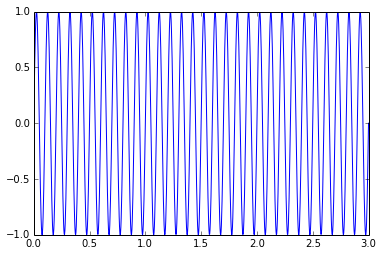

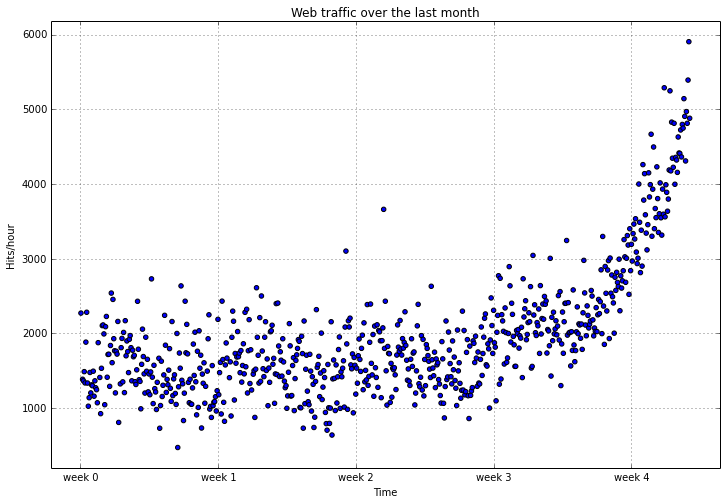

In [14]:
import matplotlib.pyplot as plt

############# Ejemplo para el alumno
xx = np.linspace(0,3,1000)
yy = np.sin(2*np.pi*10*xx)
plt.plot(xx,yy)

##### Esto hay que borrarlo para el alumno
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
